# 04 CNN IMAGES EN COULEUR

### IMPORTS DES LIBRAIRIES

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.datasets import cifar10

### IMPORT DU DATASET

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [3]:
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'bateau', 'camion']


In [4]:
y_train, y_test = y_train.flatten(), y_test.flatten()


### VISUALISATION DES DONNEES

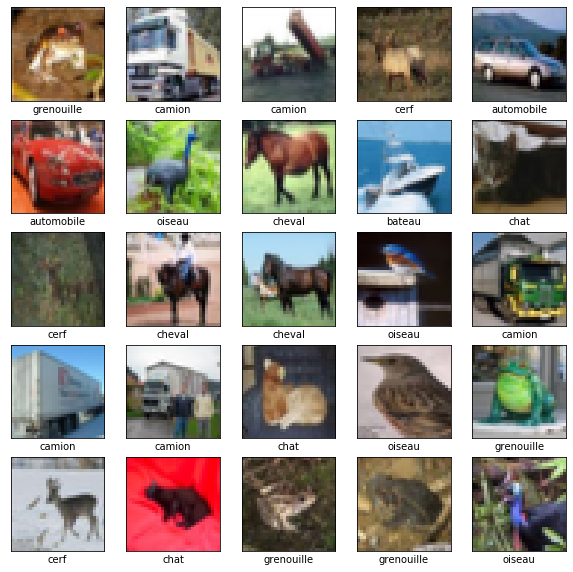

In [5]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

###  PREPROCESSING

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

## CONSTRUCTION DU MODELE


In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))



model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))



model.add( Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add( Dense(10, activation='softmax'))

### COMPILATION DU MODELE

In [8]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

### ENTRAINEMENT DU MODELE

In [10]:
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 251us/sample - loss: 1.4347 - accuracy: 0.5090 - val_loss: 1.1091 - val_accuracy: 0.6049
Epoch 2/20
50000/50000 [==============================] - 9s 190us/sample - loss: 0.9546 - accuracy: 0.6716 - val_loss: 0.9415 - val_accuracy: 0.6778
Epoch 3/20
50000/50000 [==============================] - 9s 188us/sample - loss: 0.7789 - accuracy: 0.7353 - val_loss: 0.7864 - val_accuracy: 0.7370
Epoch 4/20
50000/50000 [==============================] - 9s 189us/sample - loss: 0.6641 - accuracy: 0.7769 - val_loss: 0.7254 - val_accuracy: 0.7645
Epoch 5/20
50000/50000 [==============================] - 10s 190us/sample - loss: 0.5726 - accuracy: 0.8057 - val_loss: 0.7408 - val_accuracy: 0.7551
Epoch 6/20
50000/50000 [==============================] - 10s 192us/sample - loss: 0.4816 - accuracy: 0.8367 - val_loss: 0.6164 - val_accuracy: 0.8013
Epoch 7/20
50000/50000 [=======================

### VISUALISATION DE LA COURBE D'APPRENTISSAGE

10000/10000 - 5s - loss: 0.8735 - accuracy: 0.8302


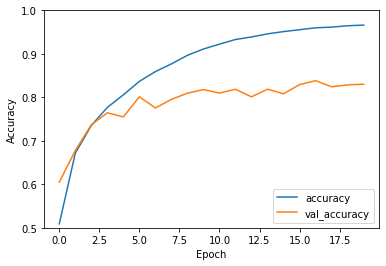

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


### PREDICTION SUR LE JEU DE TEST

In [12]:
p_test = model.predict(X_test).argmax(axis=1)

### STOCKAGE DES ERREURS DE PREDICTION

In [13]:
erreur_idx = np.where(p_test != y_test)[0]

### AFFICHAGE ALEATOIRE D'UNE ERREUR

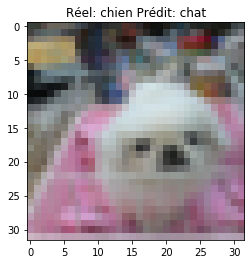

In [20]:
i = np.random.choice(erreur_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("Réel: %s Prédit: %s" % (class_names[y_test[i]], class_names[p_test[i]]));